In [1]:
%load_ext autoreload
%autoreload 2

core
ce_loss_score


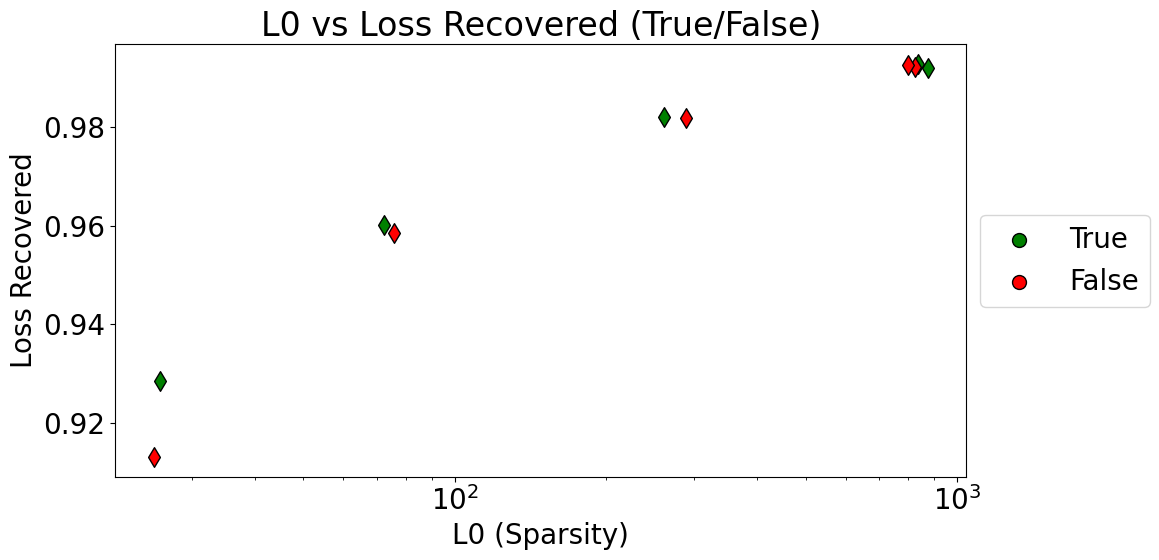

sparse_probing
sae_top_5_test_accuracy


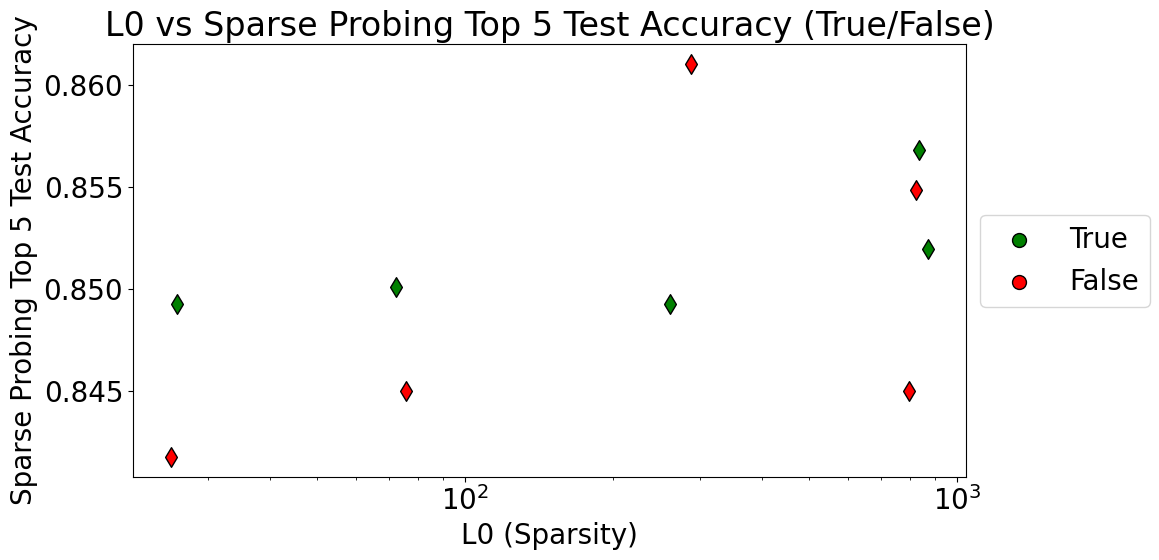

absorption
mean_absorption_fraction_score


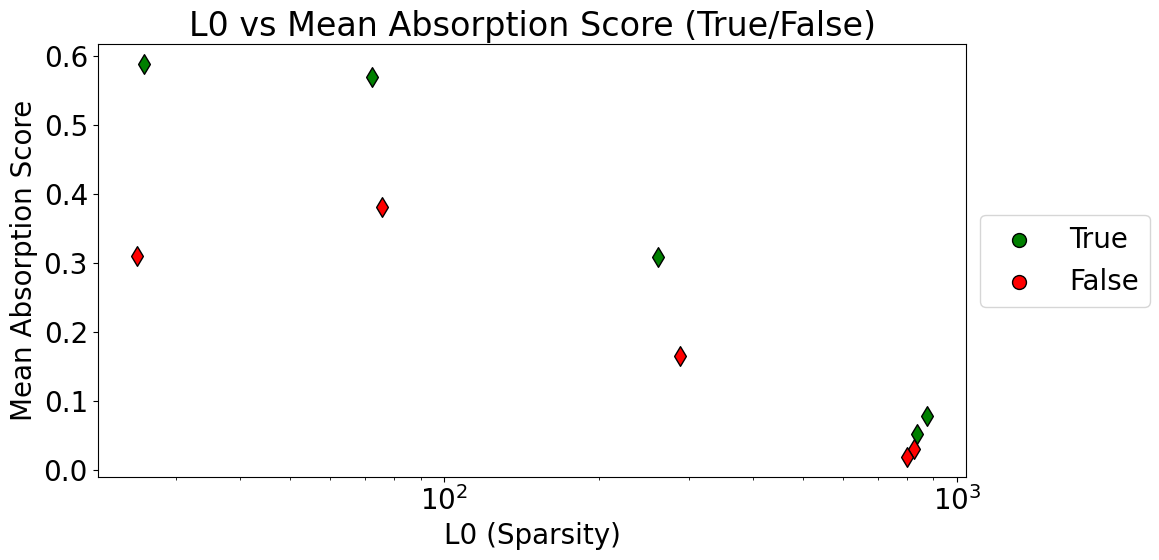

tpp
tpp_threshold_20_total_metric


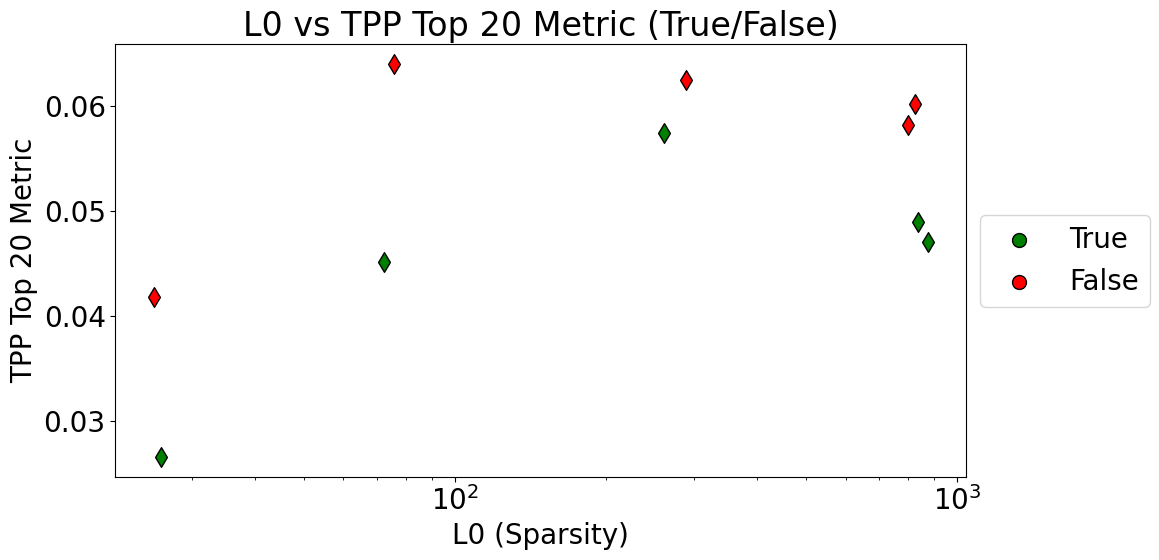

scr
scr_metric_threshold_20


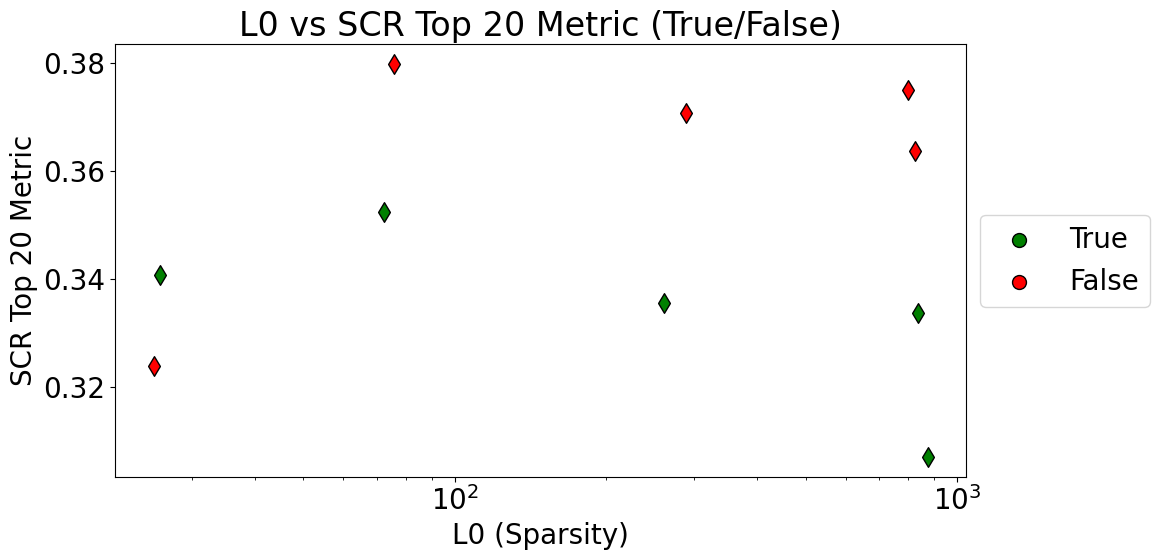

ravel
disentanglement_score


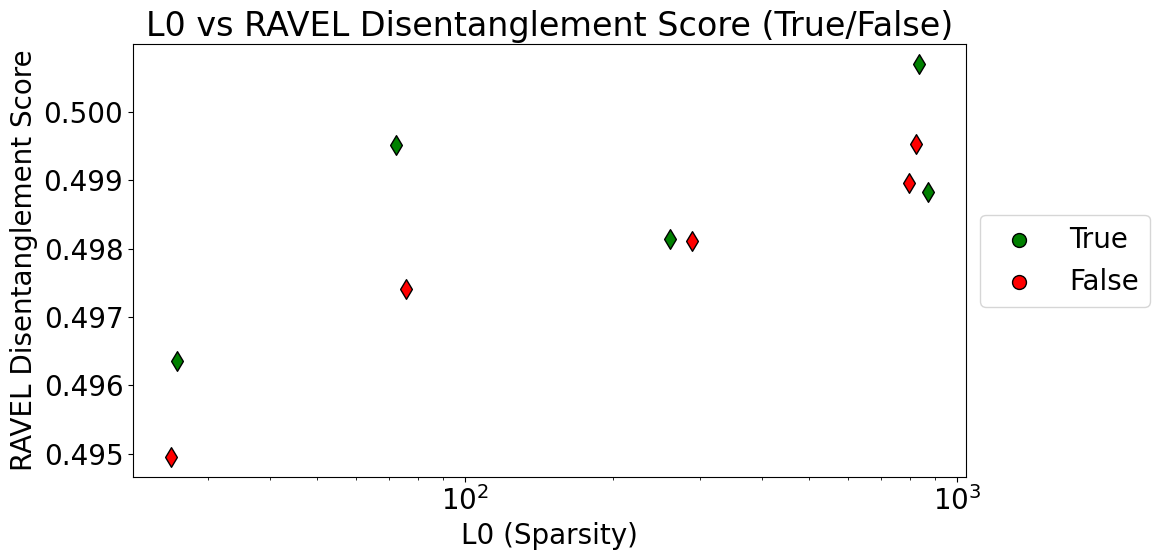

In [ ]:
from sae_bench.sae_bench_utils.graphing_utils import *

results_folders = ["/data/zixuan/phd/sae/SAEBench/eval_results"]
eval_types = [
            "core",
            "sparse_probing",
            "absorption",
            # "autointerp",
            "tpp",
            "scr",
            # "unlearning",
            "ravel"
            ]
for eval_type in eval_types:
    print(eval_type)
    eval_folders = []

    for results_folder in results_folders:
        eval_folders.append(f"{results_folder}/{eval_type}")

    eval_filenames = find_eval_results_files(eval_folders)
    # Filter to only keep filenames containing "5.3"
    # eval_filenames = [filename for filename in eval_filenames if "5.3" in filename]
    core_filenames = []
    # Filter to only keep filenames containing "normalized"
    # eval_filenames = [filename for filename in eval_filenames if "normalized" in filename]
    eval_filenames_non_normalized = [filename for filename in eval_filenames if "normalized" not in filename]
    # For each eval file, find the corresponding core file
    for eval_file in eval_filenames:
        core_file = eval_file.replace(eval_type, "core")
        if os.path.exists(core_file):
            core_filenames.append(core_file)
        else:
            print(f"Warning: Could not find corresponding core file for {eval_file}")

    # print(eval_filenames)
    # print(len(eval_filenames), len(core_filenames))
    # print(core_filenames)
    plot_results(
        eval_filenames=eval_filenames,
        core_filenames=core_filenames,
        eval_type=eval_type,
        image_base_name=f"{eval_type}_results",
        k=20,
        trainer_markers=TRAINER_MARKERS,
        trainer_colors=TRAINER_COLORS,
    )